# NEURAL NETWORKS

The data at each subsequent neuron is defined as the following.

> $Y =(\sum_{i=0}^n w_i x_i) + b$

> $w$ stands for the weight of each connection to the neuron

> $x$ stands for the value of the connected neuron from the previous value

> $b$ stands for the bias at each layer, this is a constant

> $n$ is the number of connections

> $Y$ is the output of the current neuron

> $\sum$ stands for sum

The equation you just read is called a weighed sum. We will take this weighted sum at each and every neuron as we pass information through the network. Then we will add what's called a bias to this sum. The bias allows us to shift the network up or down by a constant value. It is like the y-intercept of a line.

But that equation is the not complete one! We forgot a crucial part, **the activation function**. This is a function that we apply to the equation seen above to add complexity and dimensionality to our network. Our new equation with the addition of an activation function $F(x)$ is seen below.

> $Y =F((\sum_{i=0}^n w_i x_i) + b)$

Some common types of data a neural network uses are listed below.
- Vector Data (2D)
- Timeseries or Sequence (3D)
- Image Data (4D)
- Video Data (5D)

### Layers  
At each layer a different transformation of data occurs. initial input data is fed through the layers and eventually arrives at the output layer where we will obtain the result.  
#### Input Layer  
The input layer is the layer that our initial data is passed to.  
#### Output Layer  
The output layer is the layer that we will retrive our results from.  
#### Hidden Layer(s)    
All the other layers in our neural network are called "hidden layers". This is because they are hidden to us, we cannot observe them. Most neural networks consist of at least one hidden layer but can have an unlimited amount. Typically, the more complex the model the more hidden layers.  
#### Neurons   
Each layer is made up of what are called neurons. each neuron is responsible for generating/holding/passing ONE numeric value. 

Our input layer will have as many neurons as we have input information. For example, say we want to pass an image that is 28x28 pixels, thats 784 pixels. We would need 784 neurons in our input layer to capture each of these pixels. 

This also means that our output layer will have as many neurons as we have output information.

A hidden layer can have any number of neurons.  
#### Connected Layers   
The neurons in one layer will be connected to neurons in the subsequent layer. However, the neurons can be connected in a variety of different ways. 

### Weights  
Weights are associated with each connection in our neural network. Every pair of connected nodes will have one weight that denotes the strength of the connection between them. These are vital to the inner workings of a neural network and will be tweaked as the neural network is trained. The model will try to determine what these weights should be to achieve the best result. Weights start out at a constant or random value and will change as the network sees training data.

### Biases  
Biases are another important part of neural networks and will also be tweaked as the model is trained. A bias is simply a constant value associated with each layer. It can be thought of as an extra neuron that has no connections. The purpose of a bias is to shift an entire activation function by a constant value. This allows a lot more flexibllity when it comes to choosing an activation and training the network. There is one bias for each layer.

### Activation Function  
Activation functions are simply a function that is applied to the weighed sum of a neuron.

A list of some common activation functions and their graphs can be seen below.

- Relu (Rectified Linear Unit)

![alt text](https://yashuseth.files.wordpress.com/2018/02/relu-function.png?w=309&h=274)
- Tanh (Hyperbolic Tangent)

![alt text](http://mathworld.wolfram.com/images/interactive/TanhReal.gif)
- Sigmoid 

![alt text](https://miro.medium.com/max/970/1*Xu7B5y9gp0iL5ooBj7LtWw.png)


### Backpropagation  
Backpropagation is the fundemental algorithm behind training neural networks and is what changes the weights and biases of our network.  

#### Loss/Cost Function
At the start of training our network doesn't know anything (it has random weights and biases) and in the training phase our network will make many mistakes and poor predicitions.

For our training data we have the features (input) and the labels (expected output) and we can compare the output from our network to the expected output. Based on the difference between these values we can determine if our network has done a good job or poor job and adjust the weights and biases accordingly.

The cost/loss function is responsible for determining how well the network did. We pass it the output and the expected output, and it returns to us some value representing the cost/loss of the network. This effectively makes the networks job to optimize this cost function, trying to make it as low as possible. 

Some common loss/cost functions include.
- Mean Squared Error
- Mean Absolute Error
- Hinge Loss

#### Gradient Descent
Gradient descent and backpropagation are closely related. Gradient descent is the algorithm used to find the optimal paramaters (weights and biases) for our network, while backpropagation is the process of calculating the gradient that is used in the gradient descent step.

"Gradient descent is an optimization algorithm used to minimize some function by iteratively moving in the direction of steepest descent as defined by the negative of the gradient. In machine learning, we use gradient descent to update the parameters of our model." (https://ml-cheatsheet.readthedocs.io/en/latest/gradient_descent.html)

![alt text](https://cdn-images-1.medium.com/max/1000/1*iU1QCnSTKrDjIPjSAENLuQ.png)

### Optimizer
You may sometimes see the term optimizer or optimization function. This is simply the function that implements the backpropagation algorithm described above. Here's a list of a few common ones.
- Gradient Descent
- Stochastic Gradient Descent
- Mini-Batch Gradient Descent
- Momentum
- Nesterov Accelerated Gradient

(https://medium.com/@sdoshi579/optimizers-for-training-neural-network-59450d71caf6)

# CREATING A NEURAL NETWORK

### Basic classification: Classifying images of clothing

In [13]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [14]:
# Loading dataset
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [27]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# labels = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

# df = pd.DataFrame(data={'Label': labels, 'Class': class_names})

# df.set_index('Label', inplace=True)

# print(df.to_markdown())

The images are 28x28 NumPy arrays, with pixel values ranging from 0 to 255.  0 being black and 255 being white. This means we have a grayscale image as there are no color channels.

The labels are an array of integers, ranging from 0 to 9. These correspond to the class of clothing the image represents:

|   Label | Class       |
|--------:|:------------|
|       0 | T-shirt/top |
|       1 | Trouser     |
|       2 | Pullover    |
|       3 | Dress       |
|       4 | Coat        |
|       5 | Sandal      |
|       6 | Shirt       |
|       7 | Sneaker     |
|       8 | Bag         |
|       9 | Ankle boot  |

In [28]:
train_images.shape

(60000, 28, 28)

In [32]:
len(train_labels)

60000

In [29]:
train_images[0, 23, 23]

194

In [30]:
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [31]:
train_labels[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [33]:
test_images.shape

(10000, 28, 28)

In [34]:
len(test_labels)

10000

### Data Preprocessing

The data must be preprocessed before training the network. If you inspect the first image in the training set, you will see that the pixel values fall in the range of 0 to 255:

<function matplotlib.pyplot.show(close=None, block=None)>

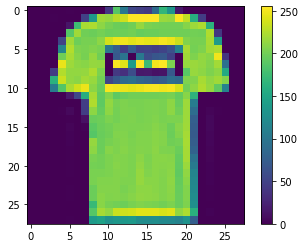

In [40]:
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)
plt.show

Scale these values to a range of 0 to 1 before feeding them to the neural network model. To do so, divide the values by 255. It's important that the training set and the testing set be preprocessed in the same way:

In [41]:
train_images = train_images / 255.0

test_images = test_images / 255.0

To verify that the data is in the correct format and that you're ready to build and train the network, let's display the first 25 images from the training set and display the class name below each image.

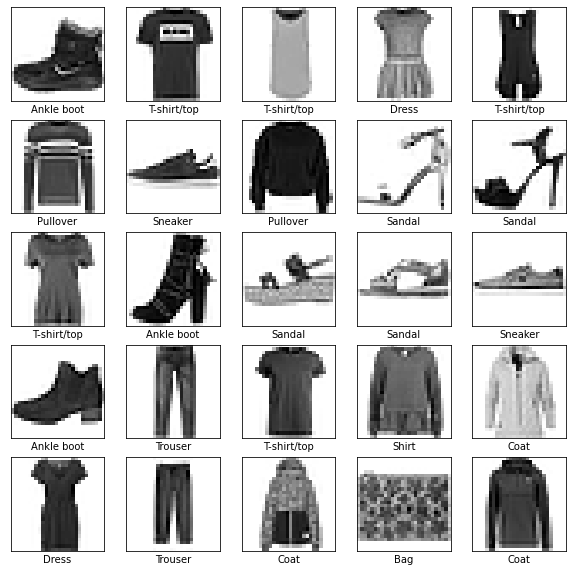

In [43]:
plt.figure(figsize=(10, 10))
for image in range(0, 25):
    plt.subplot(5, 5, image+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[image], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[image]])
plt.show()

### Building the Model  

Building the neural network requires configuring the layers of the model, then compiling the model.

#### Set up the layers

The basic building block of a neural network is the layer. Layers extract representations from the data fed into them. Hopefully, these representations are meaningful for the problem at hand.

Most of deep learning consists of chaining together simple layers. Most layers, such as tf.keras.layers.Dense, have parameters that are learned during training.

In [44]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)), # input layer (1)
    keras.layers.Dense(128, activation='relu'), # hidden layer (2)
    keras.layers.Dense(10, activation='softmax') # output layer (3) 10 output neurons bc we have 10 classes to predict on
])

The first layer in this network, tf.keras.layers.Flatten, transforms the format of the images from a two-dimensional array (of 28 by 28 pixels) to a one-dimensional array (of 28 * 28 = 784 pixels). Think of this layer as unstacking rows of pixels in the image and lining them up. This layer has no parameters to learn; it only reformats the data.

After the pixels are flattened, the network consists of a sequence of two tf.keras.layers.Dense layers. These are densely connected, or fully connected, neural layers. The first Dense layer has 128 nodes (or neurons). The second (and last) layer returns a logits array with length of 10. Each node contains a score that indicates the current image belongs to one of the 10 classes.

### Compiling the Model  

Before the model is ready for training, it needs a few more settings. These are added during the model's compile step:

- <ins>Loss Function</ins>: This measures how accurate the model is during training. You want to minimize this function to "steer" the model in the right direction.
- <ins>Optimizer</ins>: This is how the model is updated based on the data it sees and its loss function.
- <ins>Metrics</ins>: Used to monitor the training and testing steps. The following example uses accuracy, the fraction of the images that are correctly classified.

In [45]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

### Training the Model  

Training the neural network model requires the following steps:

    1. Feed the training data to the model. In this example, the training data is in the train_images and train_labels arrays.
    2. The model learns to associate images and labels.
    3. You ask the model to make predictions about a test set (in this example, the test_images array).
    4. Verify that the predictions match the labels from the test_labels array.

#### 1) Feed the Model  

To start training, call the model.fit method—so called because it "fits" the model to the training data:

In [82]:
model.fit(train_images, train_labels, epochs=10) # More epochs does not necessarily mean better accuracy on test data

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2320 - accuracy: 0.9123
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2234 - accuracy: 0.9161
Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2183 - accuracy: 0.9179
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2097 - accuracy: 0.9209
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2051 - accuracy: 0.9226
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1983 - accuracy: 0.9249
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1943 - accuracy: 0.9261
Epoch 8/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1877 - accuracy: 0.9299
Epoch 9/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1825 - accuracy: 0.9303
Epoch 10/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.178

As the model trains, the loss and accuracy metrics are displayed. This model reaches an accuracy of about 0.91 (or 91%) on the training data.

#### 2) Evaluate accuracy
Next, compare how the model performs on the test dataset:

In [83]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

print('Test accuracy:', test_acc)

313/313 - 0s - loss: 0.3637 - accuracy: 0.8848 - 302ms/epoch - 966us/step
Test accuracy: 0.8848000168800354


It turns out that the accuracy on the test dataset is a little less than the accuracy on the training dataset. This gap between training accuracy and test accuracy represents overfitting. Overfitting happens when a machine learning model performs worse on new, previously unseen inputs than it does on the training data. An overfitted model "memorizes" the noise and details in the training dataset to a point where it negatively impacts the performance of the model on the new data. For more information, see the following:  

[Demonstrate Overfitting](https://www.tensorflow.org/tutorials/keras/overfit_and_underfit#demonstrate_overfitting)
        
[Strategies to Prevent Overfitting](https://www.tensorflow.org/tutorials/keras/overfit_and_underfit#strategies_to_prevent_overfitting)

#### 3) Make Predictions  

With the model trained, you can use it to make predictions about some images. Attach a softmax layer to convert the model's linear outputs (logits) to probabilities, which should be easier to interpret.

In [84]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
predictions_interpreted = probability_model.predict(test_images)

313/313 [==============================] - 0s 968us/step


In [85]:
predictions = model.predict(test_images)

313/313 [==============================] - 0s 988us/step


Here, the model has predicted the label for each image in the testing set. Let's take a look at the first prediction:

In [86]:
predictions[0]

array([4.46520841e-11, 1.45643306e-12, 1.37677664e-11, 2.34105148e-11,
       3.71026820e-12, 1.21483108e-05, 1.23775087e-11, 7.40218733e-04,
       2.21854937e-10, 9.99247670e-01], dtype=float32)

A prediction is an array of 10 numbers. They represent the model's "confidence" that the image corresponds to each of the 10 different articles of clothing. You can see which label has the highest confidence value:

In [87]:
np.argmax(predictions[0])

9

So, the model is most confident that this image is an ankle boot, or class_names[9]. Examining the test label shows that this classification is correct:

In [88]:
test_labels[0]

9

In [89]:
class_names[9]

'Ankle boot'

<function matplotlib.pyplot.show(close=None, block=None)>

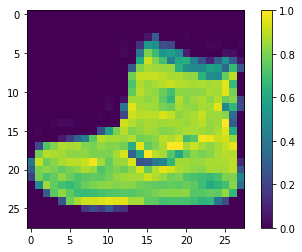

In [90]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show

In [91]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

#### 4) Verify predictions

With the model trained, you can use it to make predictions about some images.

Let's look at the 0th image, predictions, and prediction array. Correct prediction labels are blue and incorrect prediction labels are red. The number gives the percentage (out of 100) for the predicted label.

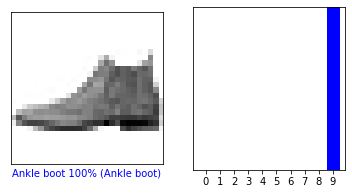

In [92]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

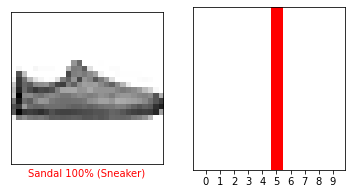

In [93]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

Let's plot several images with their predictions. Note that the model can be wrong even when very confident.

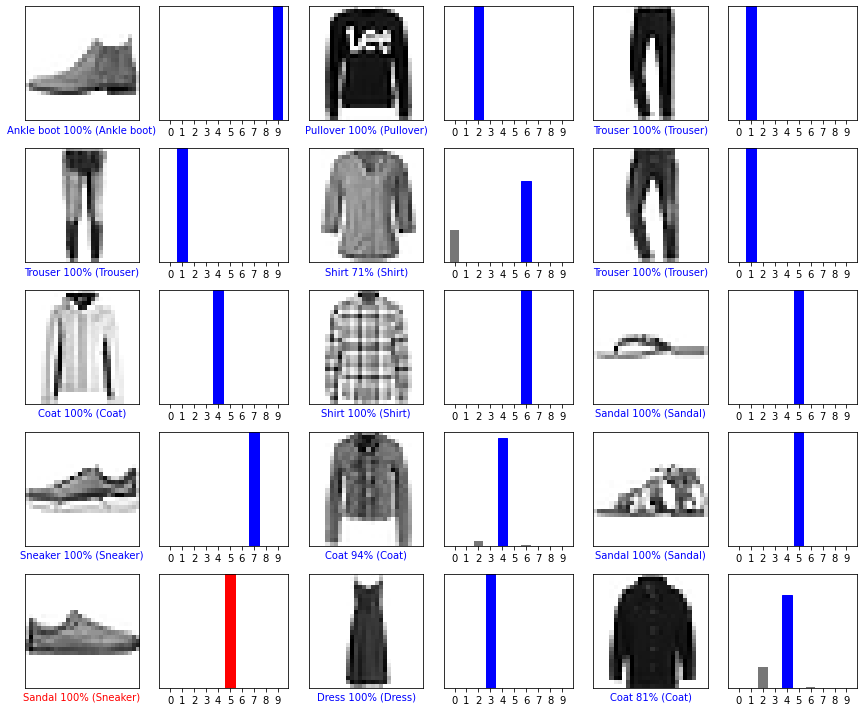

In [94]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

#### Using the Trained Model
Finally, use the trained model to make a prediction about a single image.

In [95]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


tf.keras models are optimized to make predictions on a batch, or collection, of examples at once. Accordingly, even though you're using a single image, you need to add it to a list:

In [96]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


Now predict the correct label for this image:

In [102]:
predictions_single_interpreted = probability_model.predict(img)

print(predictions_single)

1/1 [==============================] - 0s 18ms/step
[[0.08535048 0.0853426  0.23187649 0.0853426  0.08537147 0.0853426
  0.08534586 0.0853426  0.0853426  0.0853426 ]]


In [103]:
predictions_single = model.predict(img)

print(predictions_single)

1/1 [==============================] - 0s 15ms/step
[[9.2363342e-05 2.3042540e-19 9.9953115e-01 9.8852994e-14 3.3825502e-04
  1.9459190e-21 3.8291375e-05 1.3168395e-30 5.6349104e-15 3.6362161e-22]]


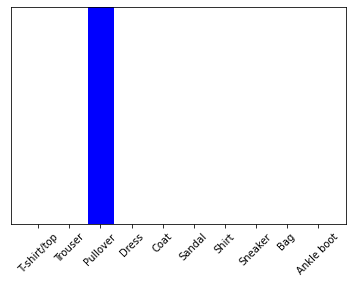

In [104]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

tf.keras.Model.predict returns a list of lists—one list for each image in the batch of data. Grab the predictions for our (only) image in the batch:

In [105]:
np.argmax(predictions_single[0])

2

And the model predicts a label as expected.

# FREECODECAMP CODE BELOW

Pick a number:  45


1/1 [==============================] - 0s 16ms/step
Sneaker
Sneaker


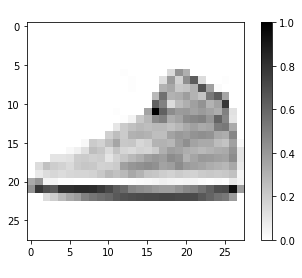

In [68]:
COLOR = 'white'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR

def predict(model, image, correct_label):
  class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
  prediction = model.predict(np.array([image]))
  predicted_class = class_names[np.argmax(prediction)]

  show_image(image, class_names[correct_label], predicted_class)


def show_image(img, label, guess):
  plt.figure()
  plt.imshow(img, cmap=plt.cm.binary)
  plt.title("Excpected: " + label)
  print(label)
  plt.xlabel("Guess: " + guess)
  print(guess)
  plt.colorbar()
  plt.grid(False)
  plt.show()


def get_number():
  while True:
    num = input("Pick a number: ")
    if num.isdigit():
      num = int(num)
      if 0 <= num <= 1000:
        return int(num)
    else:
      print("Try again...")

num = get_number()
image = test_images[num]
label = test_labels[num]
predict(model, image, label)